In [122]:
from citipy import citipy
import sys
import time
import random
import decimal
import json
import requests
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import linregress
import pandas as pd
import numpy as np
from config import api_key
from g import gkey
from pprint import pprint

In [92]:
#set random num generator for lat/lng
def gen_random_decimal(i,d):
    return decimal.Decimal('%d.%d' % (random.randint(0,i),random.randint(0,d)))

In [139]:
#get list of cities for citipy
cities = []

for k in range(5000):
  random_longitude = random.uniform(-180.0000, 180.0000)
  random_latitude = random.uniform(-180.0000, 180.0000)
  city= citipy.nearest_city(random_longitude, random_latitude)
  cities.append(city.city_name)

df_city= pd.DataFrame({'City':cities})
#drop duplicated city names to get >500 unique cities
df_city = df_city.drop_duplicates('City')
df_city=df_city['City'].str.title()
print(df_city.nunique())
print(len(df_city))


871
871


In [140]:
df_city.head()

0      Ushuaia
1       Dikson
2       Dalvik
4      Qaanaaq
5    Cape Town
Name: City, dtype: object

In [172]:
units = 'imperial'
url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
df_full = []
lost = []
space = '-'
l = 0 
counter = 0 

sys.stdout.write('working')

while l < 3:
    sys.stdout.write(space)
    sys.stdout.flush()
    l += 1
    time.sleep(0.5)

for City in df_city: 
    w_url = f"{query_url}+{City}"
    response = requests.get(w_url).json()
#     pprint(response)
    try:
        if(response['message']):
            lost.append(City)
    except:
        df_full.append({
            "city":response['name'],
            "latitude": response['coord']['lat'],
            "longitude": response['coord']['lon'],
            "temperature":response['main']['temp'],
            "humidity":response['main']['humidity'],
            "wind_speed":response['wind']['speed'],
            "clouds":response['clouds']['all']
        })
    counter +=1
    
    if(counter%10 == 0):
        sys.stdout.write(space)
        sys.stdout.flush()
        time.sleep(7)
    
    
df = pd.DataFrame(df_full) 
# print(f'cities found {len(df_full)}/{len(df_city)}')


working------------------------------------------------------------------------------------------

In [143]:
print(f'cities found {len(df_full)}/{len(df_city)}')

cities found 776/871


In [173]:
df.head()

,city,latitude,longitude,temperature,humidity,wind_speed,clouds
0,Ushuaia,-54.8000,-68.3000,49.66,46,20.71,75
1,Dikson,73.5069,80.5464,27.05,62,13.15,99
2,Dalvik,65.9702,-18.5286,26.53,77,8.01,36
3,Qaanaaq,77.4840,-69.3632,12.74,83,5.23,94
4,Cape Town,-33.9258,18.4232,66.13,72,3.00,0


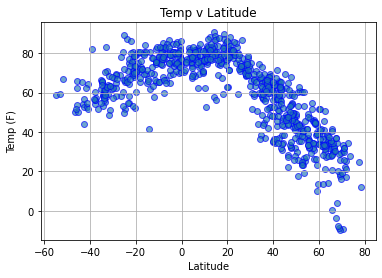

In [166]:
# Temperature (F) vs. Latitude
plt.scatter(df['latitude'], df['temperature'], alpha=0.65, edgecolor='b')

plt.grid()
plt.title("Temp v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")

plt.savefig('Temperature (F) vs. Latitude Plot.png')


Temperature (F) vs. Latitude Analysis - This scatter plot is showing the relationship between City temperatures and their global latitude. This plot is showing higher temps at latitude 0 which makes sense given that is the equator and also temperatures decreasing the closer you get to the poles, or closer to -90 and 90. 

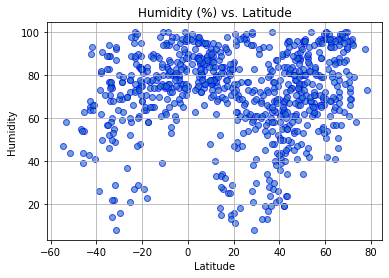

In [168]:
# Humidity (%) vs. Latitude
plt.scatter(df['latitude'], df['humidity'], alpha=0.65, edgecolor='b')

plt.grid()
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig('Humidity (%) vs. Latitude Plot.png')

Temperature (F) vs. Humidity Analysis - This scatter plot is showing the relationship between City humidity percentage and their global latitude. The plot again shows and interesting relationship with a high concentration of humidity points around latitude 0 or the equator and also a higher concentraion in the positive number which makes sense given the northern hemisphere is ending summer and into fall. 

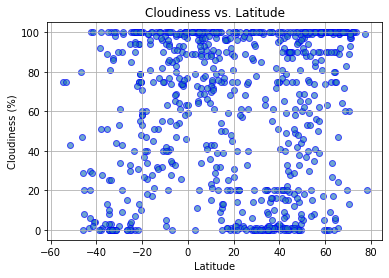

In [169]:
# Cloudiness (%) vs. Latitude
plt.scatter(df['latitude'], df['clouds'], alpha=0.65, edgecolor='b')

plt.grid()
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('Cloudiness (%) vs. Latitude Plot.png')

Temperature (F) vs. Cloudiness Analysis - This scatter plot is showing the relationship between City cloud cover and their global latitude. This plot is showing a high concentration of cloud cover fairly consistenly distributed from lat -40 to 60. This may have a corrulation to the high density of cities with humidity >50. 

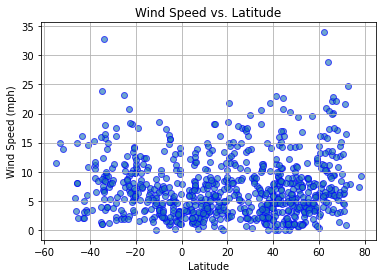

In [170]:
# Wind Speed (mph) vs. Latitude
plt.scatter(df['latitude'], df['wind_speed'], alpha=0.65, edgecolor='b')

plt.grid()
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('Wind Speed (mph) vs. Latitude Plot.png')

Temperature (F) vs. Wind Speed Analysis - This scatter plot is showing the relationship between City wind speeds in miles per hour and their global latitude. This plot is showing the highest density of wind speeds of >15mph. Which is probably a good thing given that higher windspeeds can cause issues. 

In [174]:
#print to csv 
df.to_csv('city_weather_data.csv', index=False, header=True)

Linear Regression

In [183]:
#get all cities in norther hemisphere
df_nh = df.loc[df['latitude']>0, :]
#discount double check
df_nh['latitude'].describe()


count    536.000000
mean      37.544450
std       20.073884
min        0.133300
25%       19.782425
50%       40.143500
75%       53.087500
max       78.218600
Name: latitude, dtype: float64

0.7586887600010672


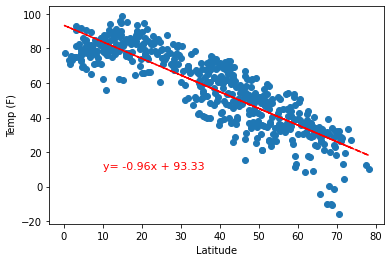

In [203]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(df_nh['latitude'], df_nh['temperature'])
regression_values = (df_nh['latitude']*slope)+intercept
lineEQ=f'y= {slope:.2f}x + {intercept:.2f}'
plt.scatter(df_nh['latitude'], df_nh['temperature'])
plt.plot(df_nh['latitude'], regression_values, "r--")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")
plt.annotate(lineEQ, (10,10), fontsize=11, color='r')
print(rvalue**2)
plt.show()

0.030791983155741876


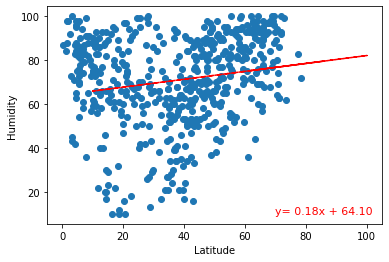

In [202]:
# Northern Hemisphere - Humidity (%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(df_nh['latitude'], df_nh['humidity'])
regression_values = (df_nh['humidity']*slope)+intercept
lineEQ=f'y= {slope:.2f}x + {intercept:.2f}'
plt.scatter(df_nh['latitude'], df_nh['humidity'])
plt.plot(df_nh['humidity'], regression_values, "r--")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(lineEQ, (70,10), fontsize=11, color='r')
print(rvalue**2)
plt.show()

0.003296103824687294


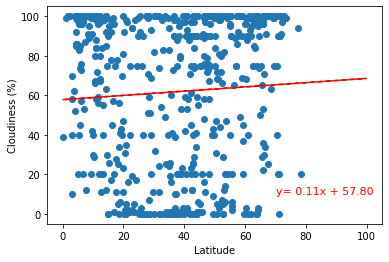

In [201]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(df_nh['latitude'], df_nh['clouds'])
regression_values = (df_nh['clouds']*slope)+intercept
lineEQ=f'y= {slope:.2f}x + {intercept:.2f}'
plt.scatter(df_nh['latitude'], df_nh['clouds'])
plt.plot(df_nh['clouds'], regression_values, "r--")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(lineEQ, (70,10), fontsize=11, color='r')
print(rvalue**2)
plt.show()

0.036986908087540495


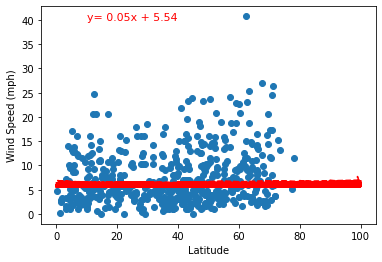

In [199]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(df_nh['latitude'], df_nh['wind_speed'])
regression_values = (df_nh['wind_speed']*slope)+intercept
lineEQ=f'y= {slope:.2f}x + {intercept:.2f}'
plt.scatter(df_nh['latitude'], df_nh['wind_speed'])
plt.plot(df_nh['clouds'], regression_values, "r--")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(lineEQ, (10,40), fontsize=11, color='r')
print(rvalue**2)
plt.show()

In [205]:
#get all cities in Southern hemisphere
df_sh = df.loc[df['latitude']<0, :]
#discount double check
df_sh['latitude'].describe()

count    240.000000
mean     -19.757613
std       13.255858
min      -54.800000
25%      -31.404575
50%      -19.995300
75%       -8.138275
max       -0.115000
Name: latitude, dtype: float64

0.4469401835220345


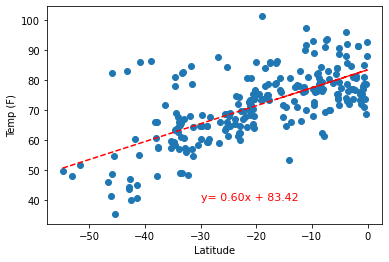

In [216]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(df_sh['latitude'], df_sh['temperature'])
regression_values = (df_sh['latitude']*slope)+intercept
lineEQ=f'y= {slope:.2f}x + {intercept:.2f}'
plt.scatter(df_sh['latitude'], df_sh['temperature'])
plt.plot(df_sh['latitude'], regression_values, "r--")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")
plt.annotate(lineEQ, (-30,40), fontsize=11, color='r')
print(rvalue**2)
plt.show()

0.02635925134739891


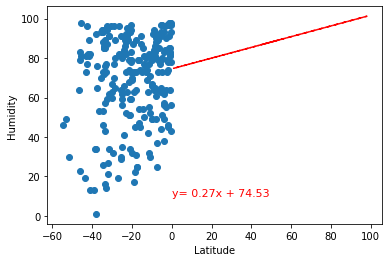

In [208]:
# Southern Hemisphere - Humidity (%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(df_sh['latitude'], df_sh['humidity'])
regression_values = (df_sh['humidity']*slope)+intercept
lineEQ=f'y= {slope:.2f}x + {intercept:.2f}'
plt.scatter(df_sh['latitude'], df_sh['humidity'])
plt.plot(df_sh['humidity'], regression_values, "r--")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(lineEQ, (0,10), fontsize=11, color='r')
print(rvalue**2)
plt.show()

0.027167811257743934


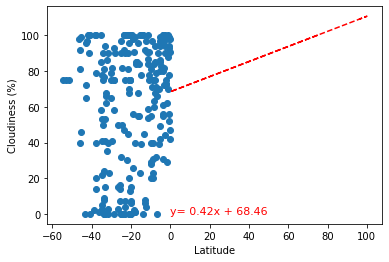

In [212]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(df_sh['latitude'], df_sh['clouds'])
regression_values = (df_sh['clouds']*slope)+intercept
lineEQ=f'y= {slope:.2f}x + {intercept:.2f}'
plt.scatter(df_sh['latitude'], df_sh['clouds'])
plt.plot(df_sh['clouds'], regression_values, "r--")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(lineEQ, (0,0), fontsize=11, color='r')
print(rvalue**2)
plt.show()

0.0990299857819843


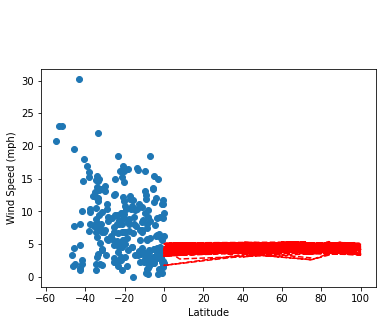

In [218]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(df_sh['latitude'], df_sh['wind_speed'])
regression_values = (df_sh['wind_speed']*slope)+intercept
lineEQ=f'y= {slope:.2f}x + {intercept:.2f}'
plt.scatter(df_sh['latitude'], df_sh['wind_speed'])
plt.plot(df_sh['clouds'], regression_values, "r--")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(lineEQ, (10,40), fontsize=11, color='r')
print(rvalue**2)
plt.show()